<center>
<img src="https://raw.githubusercontent.com/BeLight17/Pics/main/Header%20Jupyter%20Notebook/4.png">
    
##  Primera Escuela de Computación Cuántica

Autores: Fernando Martínez García\
Institución: Instituto de Física Fundamental, CSIC\
Correo: f.martinez@iff.csic.es
    

# <center> Introducción a la corrección de errores cuánticos
### <center> Laboratorio Computacional

## Outline
1. Código de 3 qubits
2. Código de Steane


## 1. Código de 3 qubits

En este ejercicio nos vamos a familiarizar con las ideas básicas de QEC usando como ejemplo un código de 3 qubits como el que se ha visto en la clase de teoría. Para ello, usaremos Qiskit. Empezamos importando los paquetes que vamos a necesitar:

In [1]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

Se nos piden las siguientes tareas:

1. Construir el circuito para codificar el estado de un qubit físico usando el código de 3 qubits.
2. Construir los circuitos para medir los estabilizadores.
3. Introduce un error $X$ en uno de los qubits del código y mide los estabilizadores. Usando estas medidas, ¿puedes deducir en que qubit ocurrió el error?.
4. Si el error que ocurre es de tipo $Z$ en vez de $X$, ¿es posible detectarlo usando este código de 3 qubits?
5. Realiza simulaciones introduciendo errores de tipo $X$ en cada qubit con probabilidad $p$ (la misma para cada qubit). Repitelo para diferentes valores de $p$ para obtener el threshold de este código para este modelo de errores. Compara estos resultados con los obtenidos analiticamente.

### Construir el circuito para codificar el estado de un qubit físico arbitrario usando el código de 3 qubits.

### Construir los circuitos para medir los estabilizadores

### Introduce un error $X$ en uno de los qubits del código y mide los estabilizadores.

### Usando estas medidas, ¿puedes deducir en que qubit ocurrió el error?.

### Si el error que ocurre es de tipo $Z$ en vez de $X$, ¿es posible detectarlo usando este código de 3 qubits?

### Realiza simulaciones introduciendo errores de tipo $X$ en cada qubit con probabilidad $p$ (la misma para cada qubit)

## 1. Código de Steane

En este ejercicio nos vamos a familiarizar con las ideas básicas del código de Steane como se ha visto en la clase de teoría:

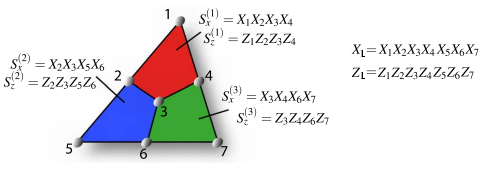

In [2]:
from IPython.display import Image
Image(filename='Steane_code.png')

Para ello, usaremos Qiskit. Empezamos importando los paquetes que vamos a necesitar:

In [4]:
from qiskit import *

Para este ejercicio, aportamos el código para inicializar el estado $|0_L\rangle$ del código de Steane:

In [5]:
def Steane_init():
    # Definimos dos registros.
    # Registro con 7 qubits del código de Steane
    cq = QuantumRegister(7, 'q')

    # Registro con 6 qubit anzilla que guardará la
    # información sobre las medidas de los estabilizadores
    aq = QuantumRegister(6, 'a')

    # Registro clásico donde guardaremos los resultados
    # de medir los estabilizadores
    mb = ClassicalRegister(6, 'm')

    # Combinamos estos registros en un circuito
    qc = QuantumCircuit(cq, aq, mb)

    # Generamos el estado 0 lógico usando el circuito
    # dado en la hoja de problemas
    qc.h([0,1,5])
    qc.cx([0,5,1,0,5,1,0,1,5],[4,3,6,2,6,3,6,4,2])
    qc.barrier()
    return qc, cq, aq, mb

Podemos dibujar este circuito:

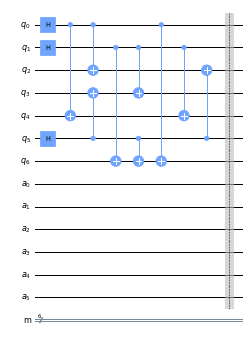

In [6]:
qc, cq, aq, mb = Steane_init()
qc.draw('mpl', scale=0.5)

Se nos piden las siguientes tareas:


1. Define los subcircuitos encargados de obtener las medidas de los estabilizadores $S_z^{(1)}$, $S_z^{(2)}$ y $S_z^{(3)}$.
2. Define los subcircuitos encargados de obtener las medidas de los estabilizadores $S_x^{(1)}$, $S_x^{(2)}$ y $S_x^{(3)}$.
3. Define una función que, dados los resultados de las medidas de los estabilizadores, te devuelva que corrección hay que hacer.
4. En el caso de que ocurriesen dos errores del mismo tipo, $X$ por ejemplo, en dos qubits diferentes, ¿sería capaz de corregirlo el código de Steane?
5. Suponiendo que la medida de, por ejemplo, el estabilizador $S_x^{(1)}$ fuese la última del circuito, ¿que ocurriría si apareciese un error $X$ en el qubit anzilla justo antes de la penúltima puerta CNOT?¿Puede el código que hemos preparado en este ejercicio corregir errores que aparecen durante el proceso de corrección?

### Define los subcircuitos encargados de obtener las medidas de los estabilizadores $S_z^{(1)}$, $S_z^{(2)}$ y $S_z^{(3)}$.

### Define los subcircuitos encargados de obtener las medidas de los estabilizadores $S_x^{(1)}$, $S_x^{(2)}$ y $S_x^{(3)}$.

Ya sabemos como realizar medidas de estabilizadores como los $S_z^{(1)}$, pero medir estabilizadores como $S_x^{(1)}$ puede ser menos intuitivo. Esto se puede conseguir utilizando puertas Hadamard para rotar la base $Z$ en la base $X$. Teniendo esto en cuenta se puede llegar a que un estabilizador de este tipo se puede medir usando una combinación de la medida de los estabilizadores $Z$ anteriores y puertas Hadamard:

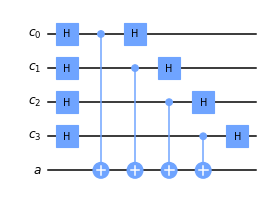

In [9]:
def Sx1_stabilizer(qc, code_qubits, anzilla_qubit):
    qc.h([0,1,2,3])
    qc.cx(code_qubits, [anzilla_qubit])
    qc.h([0,1,2,3])

cq = QuantumRegister(4, 'c')
aq = QuantumRegister(1, 'a')
qc = QuantumCircuit(cq, aq)
    
# Introducimos el estabilizador Sx1
Sx1_stabilizer(qc, [cq[0],cq[1],cq[2],cq[3]], aq[0])
qc.draw('mpl', scale=0.75)

Se puede simplificar el proceso de medida de estos estabilizadores reduciendo el número de puertas involucradas. Para esto se puede tener en cuenta que el circuito:

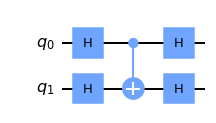

In [10]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.cx(0, 1)
qc.h([0,1])

qc.draw('mpl')

Es equivalente al siguiente circuito:

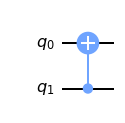

In [11]:
qc = QuantumCircuit(2)
qc.cx(1, 0)
qc.draw('mpl')

Teniendo en cuenta esto, obtén un circuito simplificado para la medida de los estabilizadores $S_x^{(1)}$, $S_x^{(2)}$ y $S_x^{(3)}$.

### Define una función que, dados los resultados de las medidas de los estabilizadores, te devuelva que corrección hay que hacer.

### En el caso de que ocurriesen dos errores del mismo tipo, $X$ por ejemplo, en dos qubits diferentes, ¿sería capaz de corregirlo el código de Steane?

### Suponiendo que la medida de, por ejemplo, el estabilizador $S_x^{(3)}$ fuese la última del circuito, ¿que ocurriría si apareciese un error $X$ en el qubit anzilla justo antes de la penúltima puerta CNOT?¿Puede el código que hemos preparado en este ejercicio corregir errores que aparecen durante el proceso de corrección?

Para este ejercicio es conveniente tener en cuenta las reglas de propagación de errores que hemos visto en la clase de teoría:

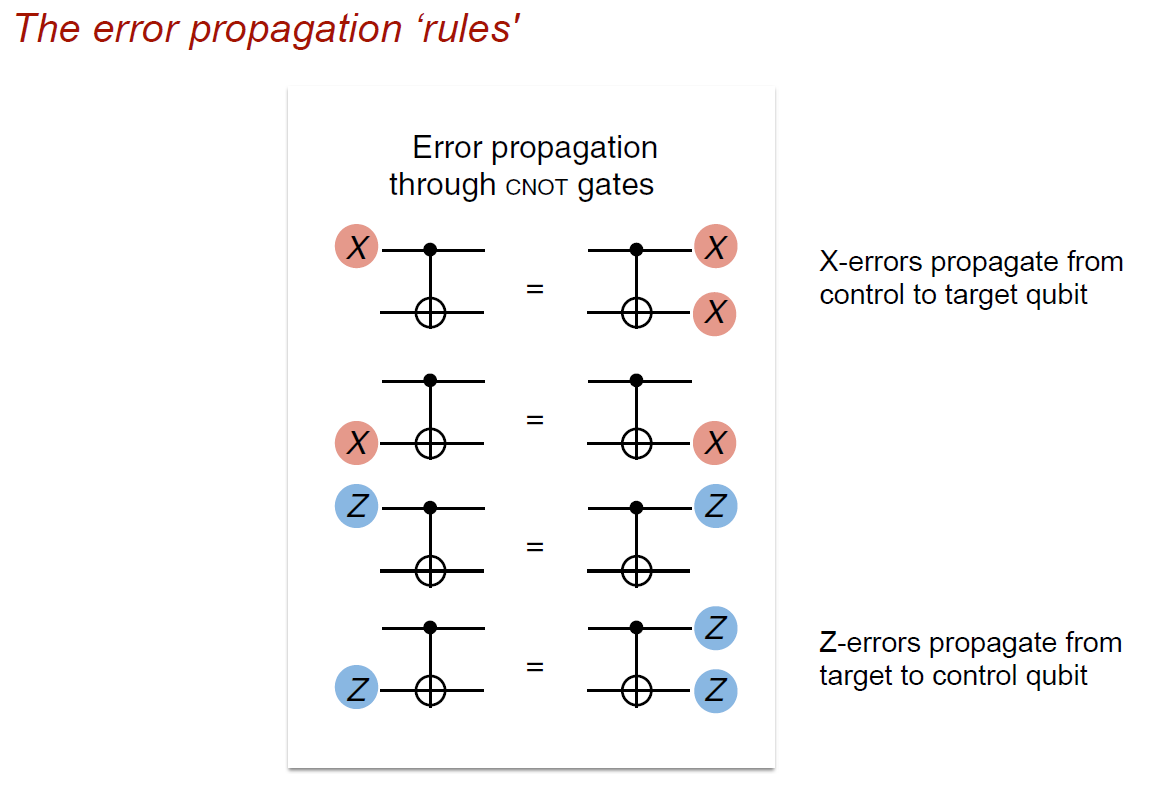

In [1]:
from IPython.display import Image
Image(filename='Error_propagation.png')

## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>